# Recommendation System

## i) Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## ii) Reading csv files using pandas

In [2]:
ratings = pd.read_csv("ml-latest_/ratings.csv")
movies = pd.read_csv("ml-latest_/movies.csv")

In [3]:
print("ratings file dataset ==>", ratings.shape)
print("movies file dataset ==>", movies.shape)

ratings file dataset ==> (27753444, 4)
movies file dataset ==> (58098, 3)


In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [5]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## iii) Data Preprocessing

In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 3 columns):
movieId    58098 non-null int64
title      58098 non-null object
genres     58098 non-null object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


In [7]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753444 entries, 0 to 27753443
Data columns (total 4 columns):
userId       int64
movieId      int64
rating       float64
timestamp    int64
dtypes: float64(1), int64(3)
memory usage: 847.0 MB


Using info() function, we are finding the information of our dataframe.

It can be seen that dataframe 'movies' has memory usage of 1.3MB, while that of ratings is 635.2 MB.

In [8]:
movies.describe()

,movieId
count,58098.000000
mean,111919.516197
std,59862.660956
min,1.000000
25%,72437.750000
50%,126549.000000
75%,161449.500000
max,193886.000000


In [9]:
ratings.describe()

,userId,movieId,rating,timestamp
count,2.775344e+07,2.775344e+07,2.775344e+07,2.775344e+07
mean,1.419420e+05,1.848800e+04,3.530445e+00,1.193122e+09
std,8.170740e+04,3.510263e+04,1.066353e+00,2.160482e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,7.117600e+04,1.097000e+03,3.000000e+00,9.986053e+08
50%,1.420220e+05,2.716000e+03,3.500000e+00,1.174256e+09
75%,2.124590e+05,7.150000e+03,4.000000e+00,1.422744e+09
max,2.832280e+05,1.938860e+05,5.000000e+00,1.537945e+09


By using describe() function we perform basis statistical operations on our dataframes

In [10]:
# Here we are dropping 'timestamp' columns, which is not necessary in our algorithm.
ratings = ratings.drop(columns=['timestamp'], axis = 0)

In [11]:
ratings.columns

Index(['userId', 'movieId', 'rating'], dtype='object')

In [12]:
# to count the number of unique users
len(ratings['userId'].unique())

283228

In [13]:
# Counting the number of unique movies in the dataset.
len(ratings['movieId'].unique())

53889

In [14]:
rating_count_corr = ratings.groupby('rating').size().reset_index(name='Count')
rating_count_corr

,rating,Count
0,0.5,442388
1,1.0,886233
2,1.5,441354
3,2.0,1850627
4,2.5,1373419
5,3.0,5515668
6,3.5,3404360
7,4.0,7394710
8,4.5,2373550
9,5.0,4071135


In [15]:
# to group our dataframe based on 'movieId' and count the number of times a particular movie is watched.
avg_rating = pd.DataFrame(ratings.groupby('movieId')['rating'].agg(['mean','count']))
avg_rating['movieId']= avg_rating.index

In [16]:
# to import NearestNeighbors from sklearn library
from sklearn.neighbors import NearestNeighbors
avg_rating.head()

,mean,count,movieId
movieId,,,
1,3.886649,68469,1
2,3.246583,27143,2
3,3.173981,15585,3
4,2.874540,2989,4
5,3.077291,15474,5


In [17]:
#only include movies with more than 10 ratings
final_data_10 = avg_rating.loc[avg_rating['count']>=1500]
print(len(final_data_10))

3100


In [18]:
final_data_10 = final_data_10.drop(columns=['movieId'], axis = 0)
final_data_10.head()

,mean,count
movieId,,
1,3.886649,68469
2,3.246583,27143
3,3.173981,15585
4,2.874540,2989
5,3.077291,15474


In [19]:
final_data_merge = pd.merge(final_data_10, ratings, on='movieId')
len(final_data_merge)

23884519

In [20]:
final_data_merge.head(10)

,movieId,mean,count,userId,rating
0,1,3.886649,68469,4,4.0
1,1,3.886649,68469,10,5.0
2,1,3.886649,68469,14,4.5
3,1,3.886649,68469,15,4.0
4,1,3.886649,68469,22,4.0
5,1,3.886649,68469,25,4.0
6,1,3.886649,68469,27,5.0
7,1,3.886649,68469,31,5.0
8,1,3.886649,68469,32,4.5
9,1,3.886649,68469,38,5.0


## iv) Visualisation 

Text(0.5, 1.0, 'Plot of counts and ratings')

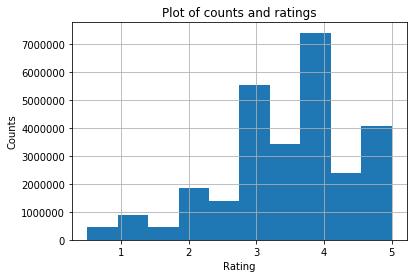

In [21]:
ratings['rating'].hist()
plt.xlabel('Rating')
plt.ylabel('Counts')
plt.title("Plot of counts and ratings")

Text(0, 0.5, 'percentage distribution of rating')

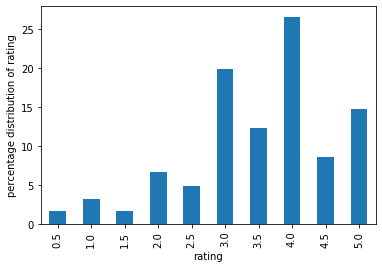

In [22]:
#Getting the percentage count of each rating value 
count_ratings = ratings.groupby('rating').count()
count_ratings['perc_total']=round(count_ratings['userId']*100/count_ratings['userId'].sum(),1)
#Visualising the percentage total for each rating
count_ratings['perc_total'].plot.bar()
plt.ylabel("percentage distribution of rating")

In [23]:
count_ratings['userId']

rating
0.5     442388
1.0     886233
1.5     441354
2.0    1850627
2.5    1373419
3.0    5515668
3.5    3404360
4.0    7394710
4.5    2373550
5.0    4071135
Name: userId, dtype: int64

## v) Applying model

In [24]:
# Here we are creating a sparse matrix, where columns = 'userId' and index = 'movieId'.

# In this dataframe, a particular row comprises of ratings given by all the users to a particular movie, 
# and if the user not given the rating then we assign 0 to it.

matrix = final_data_merge.pivot(index = 'movieId', columns = 'userId', values = 'rating').fillna(0)
matrix.head()

userId,1,2,3,4,5,6,7,8,9,10,...,283219,283220,283221,283222,283223,283224,283225,283226,283227,283228
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,5.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5
2,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# final shape of the matrix
matrix.shape

(3100, 282575)

In [26]:
#specify model parameters
model_knn = NearestNeighbors(metric='cosine',algorithm='brute')

#fit model to the data set
model_knn.fit(matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [27]:
def print_movies(movie_index):
    
    if (movie_index not in matrix.index): # here matrix index is our sparse matrix
        print('\n This movie does not belong to the modified dataframe')
         
    else:
        # taking a particular row based on movie_index for further calculations
        movie_index_arr = matrix.loc[movie_index,:].values.reshape(1,-1) 
        
        # to find the distances and indexes of the k nearest neighbors (here distance taken is cosine similarity)
        distances,indices = model_knn.kneighbors(movie_index_arr,n_neighbors = 11)
        
        for i in range(0,len(distances.flatten())):
            
            # to get title of the movie
            get_movie = movies.loc[movies['movieId']==movie_index]['title']
            
            # to print the movie name which matches most with out input value
            if i==0:
                print('Recommendations for {0}:\n'.format(get_movie))
                print('\n\n')
                
                
            else :
                #get indices of closest movie
                indices_onedim = indices.flatten()[i]
                
                #get the title of the movie
                get_movie = movies.loc[movies['movieId']==matrix.iloc[indices_onedim,:].name]['title']
                
                #print the movie
                print('{0}: {1}, with distance of {2}:'.format(i,get_movie,distances.flatten()[i]))
                print('\n')

## Recommendation system

In [32]:
# importing regular expression to find substring.
import re

# to give input(here input is case insensitive)
movie = str(input("Enter movie: "))

# to find the dataframe which contains the super string of our input.
filtered_movie = movies[movies['title'].str.contains(pat = movie, flags=re.IGNORECASE, regex=True)]

# to check, if our dataframe is empty or not.
if not filtered_movie.empty:
    movieId_ = filtered_movie.iloc[0,0]
    print_movies(movieId_)
    
else:
    print('\n This movie does not exist in given database')


Enter movie: furious
Recommendations for 4275    Fast and the Furious, The (2001)
Name: title, dtype: object:




1: 6278    2 Fast 2 Furious (Fast and the Furious 2, The)...
Name: title, dtype: object, with distance of 0.5362578185458499:


2: 5411    xXx (2002)
Name: title, dtype: object, with distance of 0.5646769658810151:


3: 3627    Gone in 60 Seconds (2000)
Name: title, dtype: object, with distance of 0.5730044666644502:


4: 4273    Lara Croft: Tomb Raider (2001)
Name: title, dtype: object, with distance of 0.6007359487582686:


5: 11123    Fast and the Furious: Tokyo Drift, The (Fast a...
Name: title, dtype: object, with distance of 0.600776607497979:


6: 4176    Mummy Returns, The (2001)
Name: title, dtype: object, with distance of 0.6075424397903793:


7: 4250    Swordfish (2001)
Name: title, dtype: object, with distance of 0.607844675375081:


8: 4607    Rush Hour 2 (2001)
Name: title, dtype: object, with distance of 0.6120738149883469:


9: 5363    Men in Black II (a.k.a

In [33]:
# importing regular expression to find substring.
import re

# to give input(here input is case insensitive)
movie = str(input("Enter movie: "))

# to find the dataframe which contains the super string of our input.
filtered_movie = movies[movies['title'].str.contains(pat = movie, flags=re.IGNORECASE, regex=True)]

# to check, if our dataframe is empty or not.
if not filtered_movie.empty:
    movieId_ = filtered_movie.iloc[0,0]
    print_movies(movieId_)
    
else:
    print('\n This movie does not exist in given database')

Enter movie: avatar
Recommendations for 14652    Avatar (2009)
Name: title, dtype: object:




1: 12666    Iron Man (2008)
Name: title, dtype: object, with distance of 0.44084815382041265:


2: 15607    Inception (2010)
Name: title, dtype: object, with distance of 0.44749699775957263:


3: 12782    WALL·E (2008)
Name: title, dtype: object, with distance of 0.46371424750584256:


4: 14058    District 9 (2009)
Name: title, dtype: object, with distance of 0.46830269584957407:


5: 13812    Up (2009)
Name: title, dtype: object, with distance of 0.4692320924840103:


6: 12559    Dark Knight, The (2008)
Name: title, dtype: object, with distance of 0.48912479362273587:


7: 14658    Sherlock Holmes (2009)
Name: title, dtype: object, with distance of 0.49470737649373064:


8: 13691    Inglourious Basterds (2009)
Name: title, dtype: object, with distance of 0.5063756648739401:


9: 13729    Star Trek (2009)
Name: title, dtype: object, with distance of 0.507986720321553:


10: 13834    Hangover,

In [34]:
# importing regular expression to find substring.
import re

# to give input(here input is case insensitive)
movie = str(input("Enter movie: "))

# to find the dataframe which contains the super string of our input.
filtered_movie = movies[movies['title'].str.contains(pat = movie, flags=re.IGNORECASE, regex=True)]

# to check, if our dataframe is empty or not.
if not filtered_movie.empty:
    movieId_ = filtered_movie.iloc[0,0]
    print_movies(movieId_)
    
else:
    print('\n This movie does not exist in given database')


Enter movie: big hero
Recommendations for 25000    Big Hero 6 (2014)
Name: title, dtype: object:




1: 32293    Inside Out (2015)
Name: title, dtype: object, with distance of 0.4760173373593879:


2: 24236    Guardians of the Galaxy (2014)
Name: title, dtype: object, with distance of 0.49754360547345644:


3: 15096    How to Train Your Dragon (2010)
Name: title, dtype: object, with distance of 0.5350499418887374:


4: 24014    How to Train Your Dragon 2 (2014)
Name: title, dtype: object, with distance of 0.5532183211816857:


5: 19964    Wreck-It Ralph (2012)
Name: title, dtype: object, with distance of 0.5547604881912541:


6: 13812    Up (2009)
Name: title, dtype: object, with distance of 0.5565849307178057:


7: 39494    Zootopia (2016)
Name: title, dtype: object, with distance of 0.5629417009600071:


8: 17997    Avengers, The (2012)
Name: title, dtype: object, with distance of 0.5679726001063015:


9: 23092    The Lego Movie (2014)
Name: title, dtype: object, with distance of 0.5

In [36]:
# importing regular expression to find substring.
import re

# to give input(here input is case insensitive)
movie = str(input("Enter movie: "))

# to find the dataframe which contains the super string of our input.
filtered_movie = movies[movies['title'].str.contains(pat = movie, flags=re.IGNORECASE, regex=True)]

# to check, if our dataframe is empty or not.
if not filtered_movie.empty:
    movieId_ = filtered_movie.iloc[0,0]
    print_movies(movieId_)
    
else:
    print('\n This movie does not exist in given database')


Enter movie: conjuring
Recommendations for 21558    Conjuring, The (2013)
Name: title, dtype: object:




1: 17047    Insidious (2010)
Name: title, dtype: object, with distance of 0.44495222732112283:


2: 24130    Babadook, The (2014)
Name: title, dtype: object, with distance of 0.5532093920496847:


3: 26820    It Follows (2014)
Name: title, dtype: object, with distance of 0.5816907909025131:


4: 18999    Cabin in the Woods, The (2012)
Name: title, dtype: object, with distance of 0.6143529559847323:


5: 14289    Paranormal Activity (2009)
Name: title, dtype: object, with distance of 0.6397898028959523:


6: 21358    Purge, The (2013)
Name: title, dtype: object, with distance of 0.6573883565184659:


7: 39492    10 Cloverfield Lane (2016)
Name: title, dtype: object, with distance of 0.6684778019119348:


8: 12396    [REC] (2007)
Name: title, dtype: object, with distance of 0.6836928950908805:


9: 13811    Drag Me to Hell (2009)
Name: title, dtype: object, with distance of 0.6862651

In [38]:
# importing regular expression to find substring.
import re

# to give input(here input is case insensitive)
movie = str(input("Enter movie: "))

# to find the dataframe which contains the super string of our input.
filtered_movie = movies[movies['title'].str.contains(pat = movie, flags=re.IGNORECASE, regex=True)]

# to check, if our dataframe is empty or not.
if not filtered_movie.empty:
    movieId_ = filtered_movie.iloc[0,0]
    print_movies(movieId_)
    
else:
    print('\n This movie does not exist in given database')


Enter movie: seven pounds
Recommendations for 13279    Seven Pounds (2008)
Name: title, dtype: object:




1: 11207    Pursuit of Happyness, The (2006)
Name: title, dtype: object, with distance of 0.6241163874860124:


2: 13300    Curious Case of Benjamin Button, The (2008)
Name: title, dtype: object, with distance of 0.6798257879481778:


3: 12330    Bucket List, The (2007)
Name: title, dtype: object, with distance of 0.6817761505175464:


4: 13302    Yes Man (2008)
Name: title, dtype: object, with distance of 0.6992838362339737:


5: 12784    Hancock (2008)
Name: title, dtype: object, with distance of 0.70267399995153:


6: 12293    I Am Legend (2007)
Name: title, dtype: object, with distance of 0.7037163649328829:


7: 16724    Limitless (2011)
Name: title, dtype: object, with distance of 0.7168850674393211:


8: 14931    Shutter Island (2010)
Name: title, dtype: object, with distance of 0.7196945176755323:


9: 14564    Blind Side, The  (2009)
Name: title, dtype: object, with dista

In [45]:
# importing regular expression to find substring.
import re

# to give input(here input is case insensitive)
movie = str(input("Enter movie: "))

# to find the dataframe which contains the super string of our input.
filtered_movie = movies[movies['title'].str.contains(pat = movie, flags=re.IGNORECASE, regex=True)]

# to check, if our dataframe is empty or not.
if not filtered_movie.empty:
    movieId_ = filtered_movie.iloc[0,0]
    print_movies(movieId_)
    
else:
    print('\n This movie does not exist in given database')


Enter movie: exorcism of emily
Recommendations for 10447    Exorcism of Emily Rose, The (2005)
Name: title, dtype: object:




1: 10326    Skeleton Key, The (2005)
Name: title, dtype: object, with distance of 0.6619788824226447:


2: 8264    Grudge, The (2004)
Name: title, dtype: object, with distance of 0.6789961161040459:


3: 10926    Hills Have Eyes, The (2006)
Name: title, dtype: object, with distance of 0.7056614230078659:


4: 11011    Silent Hill (2006)
Name: title, dtype: object, with distance of 0.7069933412814418:


5: 9533    Ring Two, The (2005)
Name: title, dtype: object, with distance of 0.7094436641709898:


6: 10616    Descent, The (2005)
Name: title, dtype: object, with distance of 0.7154843964614186:


7: 6841    Gothika (2003)
Name: title, dtype: object, with distance of 0.7227188833513671:


8: 10545    Saw II (2005)
Name: title, dtype: object, with distance of 0.7294790078280846:


9: 14289    Paranormal Activity (2009)
Name: title, dtype: object, with distance of

In [48]:
# importing regular expression to find substring.
import re

# to give input(here input is case insensitive)
movie = str(input("Enter movie: "))

# to find the dataframe which contains the super string of our input.
filtered_movie = movies[movies['title'].str.contains(pat = movie, flags=re.IGNORECASE, regex=True)]

# to check, if our dataframe is empty or not.
if not filtered_movie.empty:
    movieId_ = filtered_movie.iloc[0,0]
    print_movies(movieId_)
    
else:
    print('\n This movie does not exist in given database')


Enter movie: murder myster
Recommendations for 488    Manhattan Murder Mystery (1993)
Name: title, dtype: object:




1: 2888    Crimes and Misdemeanors (1989)
Name: title, dtype: object, with distance of 0.6527806539285289:


2: 1216    Manhattan (1979)
Name: title, dtype: object, with distance of 0.6645120690798949:


3: 1642    Deconstructing Harry (1997)
Name: title, dtype: object, with distance of 0.6662469457801158:


4: 344    Bullets Over Broadway (1994)
Name: title, dtype: object, with distance of 0.6694750690513234:


5: 1982    Purple Rose of Cairo, The (1985)
Name: title, dtype: object, with distance of 0.6711713443580168:


6: 2665    Radio Days (1987)
Name: title, dtype: object, with distance of 0.684787374404284:


7: 1056    Bananas (1971)
Name: title, dtype: object, with distance of 0.6866060406483856:


8: 1037    Everyone Says I Love You (1996)
Name: title, dtype: object, with distance of 0.688913287622449:


9: 1055    Sleeper (1973)
Name: title, dtype: object, with